# IMPLEMENTASI MACHINE LEARNING PYTHON

Dataset yang digunakan car evaluation dataset. Data ini diunduh dari https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

by : Moch Amin Irwanto

In [4]:
import pandas as pd 
df=pd.read_csv('D:/Final Project/car.data.csv',sep=',') #membaca dataset
df.head(20)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


## DATA PREPROCESSING

visualisasi statistika deskriptif untuk mengenali data yang akan diolah dan melakukan cleaning data jika terdapat data yang tidak konsisten, outlier atau hilang(missing)

In [5]:
df=df.rename(columns={"vhigh":"buying",
                      "vhigh.1":"maint",
                      "2":"doors", 
                      "2.1":"persons", 
                      "small":"lug_boot",
                      "low":"safety",
                      "unacc":"class"}) #mengganti nama kolom

mengganti nama kolom untuk mempermudah pengolahan data

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info() #memeriksa data missing tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


memeriksa data yang hilang (null). jika terdapat data null maka dilakukan cleaning data

In [10]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,more,med,high,unacc
freq,432,432,432,576,576,576,1209


In [11]:
df.keys()

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
df["buying"].value_counts() #memeriksa distribusi dan konsistensi data tiap kolom kategori

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

In [13]:
df["maint"].value_counts() #memeriksa distribusi dan konsistensi data tiap kolom kategori

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64

In [14]:
df["lug_boot"].value_counts() #memeriksa distribusi dan konsistensi data tiap kolom kategori

med      576
big      576
small    575
Name: lug_boot, dtype: int64

In [15]:
df["safety"].value_counts() #memeriksa distribusi dan konsistensi data tiap kolom kategori

high    576
med     576
low     575
Name: safety, dtype: int64

In [16]:
df["class"].value_counts() #memeriksa distribusi dan konsistensi data tiap kolom kategori

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [17]:
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique()) #memeriksa distribusi dan konsistensi data tiap kolom kategori dengan looping

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['med' 'high' 'low'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [60]:
for i in df.columns:
    print(df[i].value_counts()) #memeriksa distribusi dan konsistensi data tiap kolom kategori dengan looping
    print()

med      432
low      432
high     432
vhigh    431
Name: buying, dtype: int64

med      432
low      432
high     432
vhigh    431
Name: maint, dtype: int64

3        432
5more    432
4        432
2        431
Name: doors, dtype: int64

more    576
4       576
2       575
Name: persons, dtype: int64

med      576
big      576
small    575
Name: lug_boot, dtype: int64

med     576
high    576
low     575
Name: safety, dtype: int64

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [18]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
import seaborn as sns

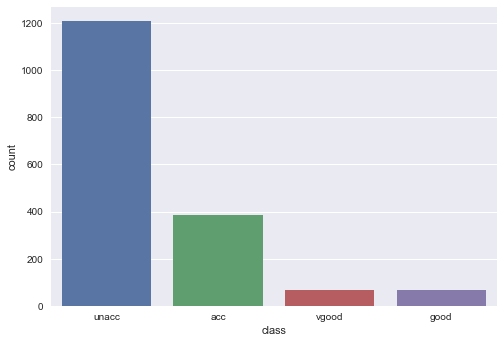

In [19]:
sns.countplot(df['class']) #visualisasi data kelas

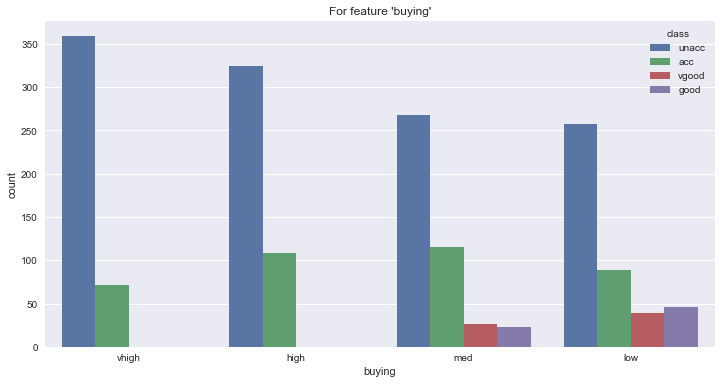

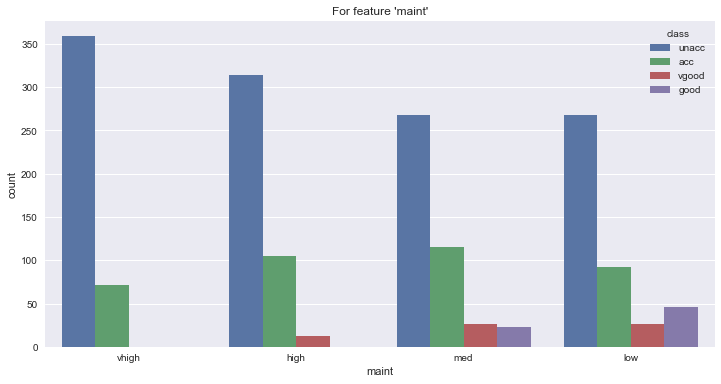

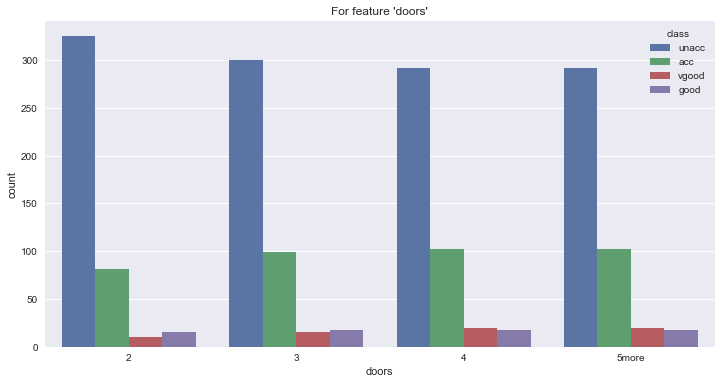

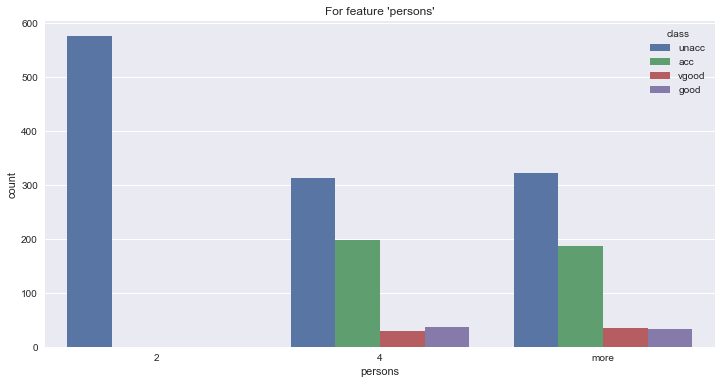

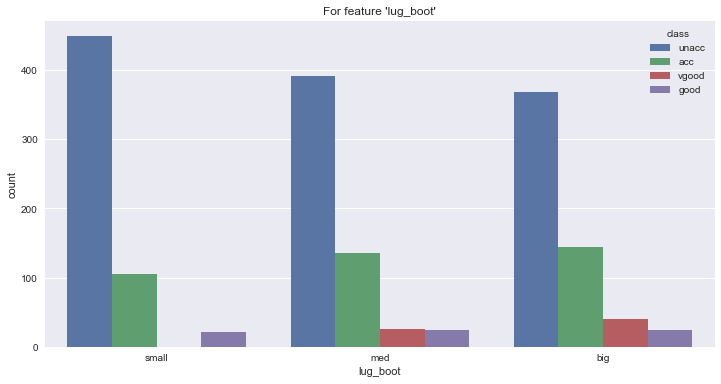

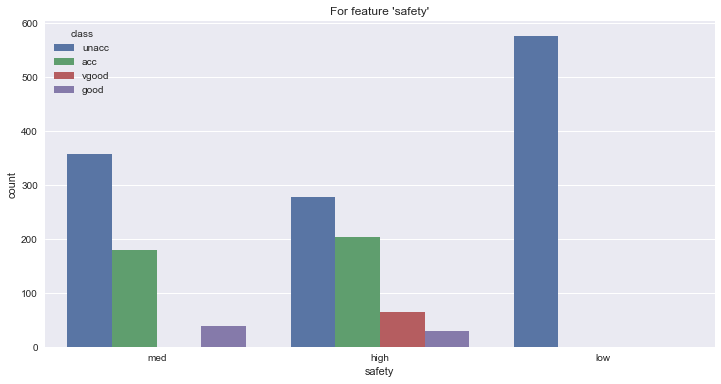

In [20]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(df[i],hue=df['class']) #visualisasi data kelas tiap kolom dengan looping

In [22]:
from sklearn.preprocessing import LabelEncoder #categorical Encoding kolom (merubah data kategori menjadi angka)

label_encoder = LabelEncoder()
df["buying"] = label_encoder.fit_transform(df["buying"])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,vhigh,2,2,small,med,unacc
1,3,vhigh,2,2,small,high,unacc
2,3,vhigh,2,2,med,low,unacc
3,3,vhigh,2,2,med,med,unacc
4,3,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,1,low,5more,more,med,med,good
1723,1,low,5more,more,med,high,vgood
1724,1,low,5more,more,big,low,unacc
1725,1,low,5more,more,big,med,good


In [23]:
for i in df.columns: #categorical Encoding semua kolom (merubah data kategori menjadi angka) dengan looping
    df[i]=label_encoder.fit_transform(df[i])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


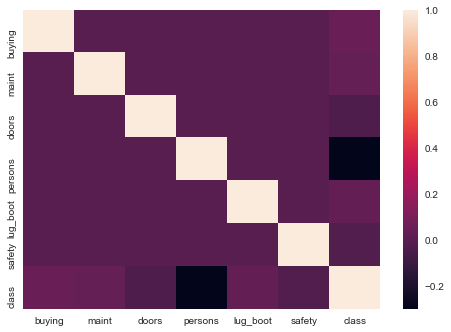

In [24]:
corr=df.corr()
sns.heatmap(corr)

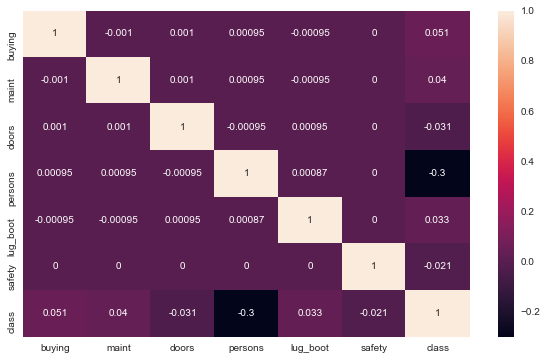

In [25]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

saya melakukan korelasi menggunakan heatmap untuk mengetahui hubungan antar variabel

In [26]:
import numpy as np

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int64
 1   maint     1727 non-null   int32
 2   doors     1727 non-null   int32
 3   persons   1727 non-null   int32
 4   lug_boot  1727 non-null   int32
 5   safety    1727 non-null   int32
 6   class     1727 non-null   int32
dtypes: int32(6), int64(1)
memory usage: 54.1 KB


In [27]:
np.sum(df.isnull()) #deteksi missing value

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

data tidak ada yang missing yang berarti semua data terisi dengan lengkap jadi dilanjutkan ke proses selanjutnya

In [34]:
for i in df.columns:
    print(df[i].value_counts())
    print()

2    432
1    432
0    432
3    431
Name: buying, dtype: int64

2    432
1    432
0    432
3    431
Name: maint, dtype: int64

3    432
2    432
1    432
0    431
Name: doors, dtype: int64

2    576
1    576
0    575
Name: persons, dtype: int64

1    576
0    576
2    575
Name: lug_boot, dtype: int64

2    576
0    576
1    575
Name: safety, dtype: int64

2    1209
0     384
1      69
3      65
Name: class, dtype: int64



semua data konsisten. jadi dapat dilanjutkan ke proses pemeriksaan selanjutnya

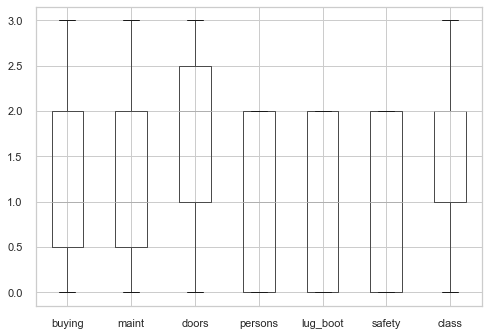

In [28]:
sns.set(style="whitegrid")
df.boxplot(["buying","maint","doors","persons","lug_boot","safety","class"]) #deteksi outlier

data tidak ada yang outlier. sejauh ini data layak untuk diolah jadi bisa dilanjutkan ke proses selanjutnya

## PERMODELAN DATA

untuk mencari model terbaik disini saya membandingkan model logistik regresion, KNN dan random forest classifier. 

In [29]:
X=df[df.columns[:-1]] #menentukan variabel x dan y
y=df['class']
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [30]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f'X train: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (1208, 6)
X test: (519, 6)
y train: (1208,)
y test: (519,)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


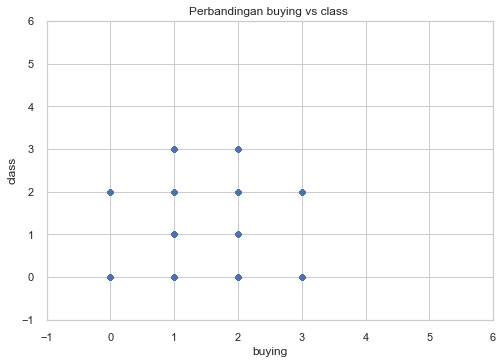

In [39]:
df.plot(kind="scatter", x="buying", y="class") 

plt.title("Perbandingan buying vs class ")
plt.xlabel("buying")
plt.ylabel("class")
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.grid(True)
plt.show()

karena semua variabel terutama variabel y kategori jadi seharusnya tidak perlu dilakukan scatterplot

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.6685934489402697

dari logreg.score tersebut diketahui bahwa akurasi yang diperoleh dari model regresi logistik adalah 67%. kemudian kita coba tes modelnya dengan menggunakan learning curve agar dapat dipelajari dan dievaluasi

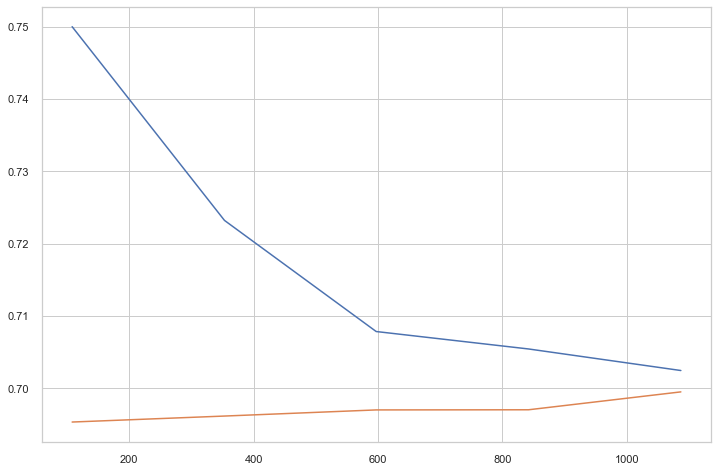

In [46]:
from sklearn.model_selection import learning_curve

lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1) 
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

Dari grafik tersebut diketahui bahwa dengan bertambahnya jumlah sampel maka akurasi semakin menurun. disini saya akan mengevaluasi model untuk mencari akurasi terbaik

In [47]:
from sklearn.model_selection import validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

curve

(array([[0.70600414, 0.70600414, 0.70600414, 0.70630817, 0.70630817],
        [0.70600414, 0.70600414, 0.70600414, 0.70630817, 0.70630817],
        [0.70496894, 0.70807453, 0.71325052, 0.70320579, 0.70527404],
        [0.69875776, 0.70496894, 0.71428571, 0.69596691, 0.69389866]]),
 array([[0.70661157, 0.70661157, 0.70661157, 0.70539419, 0.70539419],
        [0.70661157, 0.70661157, 0.70661157, 0.70539419, 0.70539419],
        [0.71487603, 0.68181818, 0.69008264, 0.70954357, 0.7219917 ],
        [0.71487603, 0.66528926, 0.67355372, 0.71784232, 0.71369295]]))

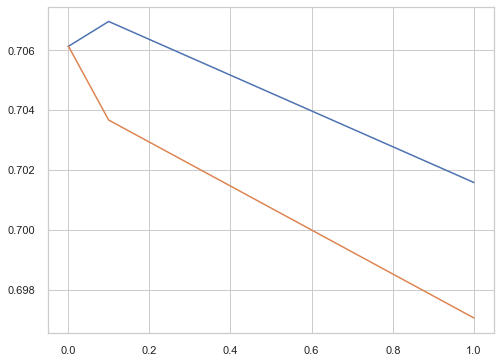

In [48]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

dari grafik tersebut diketahui bahwa C=0.1 memberikan hasil yang baik.

kemudian lanjut ketahap selanjutnya, karena ini adalah klasifikasi multikelas dan memiliki kumpulan data yang kecil, kita dapat menggunakan GridSearch untuk mendapatkan parameter terbaik.

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [52]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7102705668529886


Jadi, dengan parameter tersebut, kita bisa mendapatkan akurasi 71%. karena akurasi regresi masih rendah mari kita bandingkan dengan model kasifikasi KNN

## KNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_jobs=-1)

knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.8747591522157996

dari knn.score tersebut diketahui bahwa akurasi model yang didapatkan adalah 87%

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       115
           1       0.67      0.38      0.48        21
           2       0.92      0.98      0.95       356
           3       1.00      0.48      0.65        27

    accuracy                           0.87       519
   macro avg       0.83      0.64      0.71       519
weighted avg       0.87      0.87      0.87       519



untuk memastikan kembali disini saya menggunakan f1-score juga untuk mengevaluasi model klasifikasi. dari hasil f-score tersebut diketahui bahwa akurasi yang didapatkan adalah 87%.

Sekarang saya memeriksa semua parameter untuk 'n_neighbours' dengan menggunakan cross validation sehingga saya dapat mevisualisasikan efek n_neighbours.

Text(0, 0.5, 'accuracy')

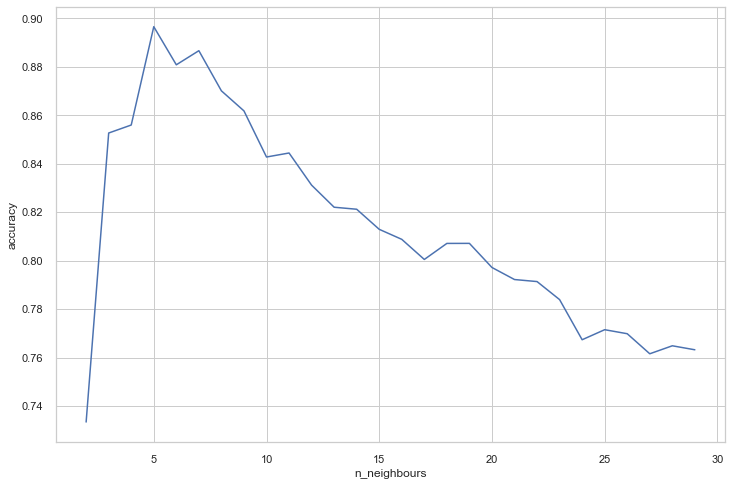

In [62]:
from sklearn.model_selection import cross_val_score

avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())
    
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

Jadi, dengan algoritma KNN Classification dan n_neighbours=5 memberikan akurasi yang terbaik dengan akurasi sekitar lebih dari 89%. dapat sisimpulkan bahwa model yang dihasilkan dengan menggunakan KNN classifier lebih baik daripada regresi logistik. kemudian saya akan mencoba membandingkan dengan random forest classifier.

## Random Forests Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average="macro"))

0.953757225433526
0.9256064733497738


dari rfc.score tersebut diketahui bahwa akurasi model yang didapatkan adalah 95%. Kemudian sama seperti sebelumnya saya akan mevisualisasikan n_estimator pada model

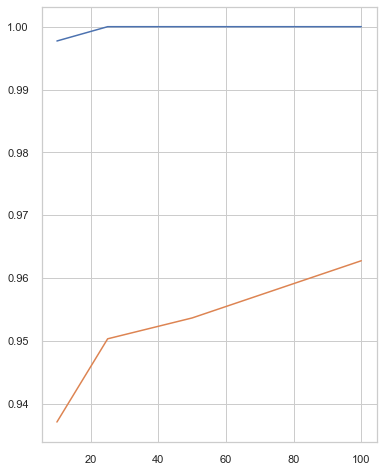

In [68]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

Dari grafik tersebut diketahui bahwa dengan meningkatnya n_estimator, akurasi pengujian meningkat. Model mengevaluasi terbaik diperoleh pada n_estimators=100 yaitu akurasi 96,3%.

Kemudian saya akan melakukan pengecekan bagaimana model cocok untuk berbagai nilai 'max_features'

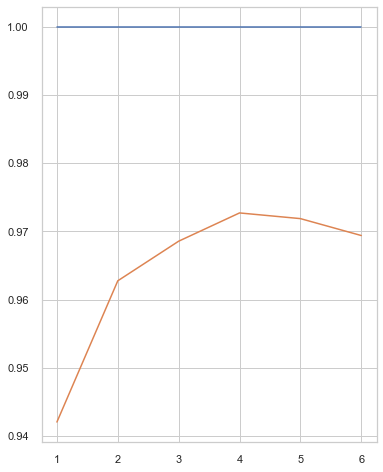

In [80]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

Dari grafik tersebut, terlihat bahwa model memberikan hasil terbaik untuk max_features=4 dengan akurasi mencapai lebih dari 97%.

Cara lain yang lebih mudah adalah dengan menggunakan GridSearch untuk mendapatkan kombinasi parameter terbaik. Karena kumpulan data yang kecil, GridSearch akan membutuhkan lebih sedikit waktu.

In [81]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=51),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]})

In [82]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
0.978477961432507


dengan grid search score diperoleh RFC score mencapai akurasi 97,84%. kemudian sama seperti sebelumnya saya akan menjalankan dan mengevaluasi model tersebut dengan menggunakan learning_curve

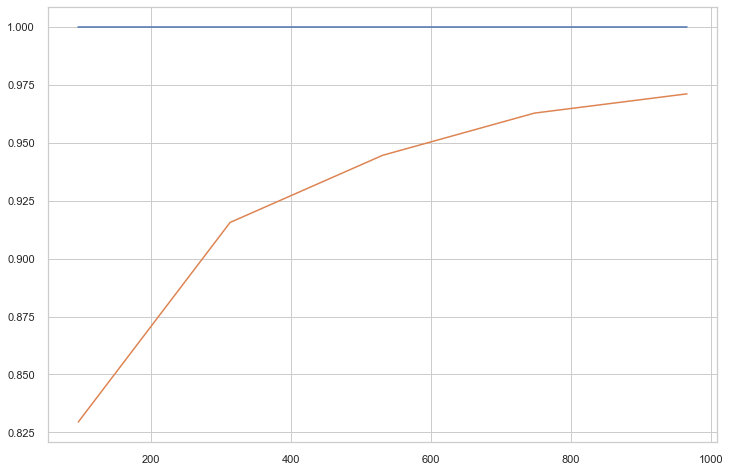

In [83]:
lc=learning_curve(RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=4,max_depth=20,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

Model akurasi data training adalah 1, tetapi akurasi data test kurang dari 1.

Untuk mengurangi varians, kita dapat melakukan penambahan data sample karena dari grafik sebelumnya diketahui bahwa semakin banyak sampel akan meningkatkan model. dan juga kita dapat megurangi atau menghilangkan variabel x. mari kita coba untuk mengurangi salah satu variabel x.

In [92]:
print(X.columns)
print(rfc.feature_importances_)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[0.18016727 0.16340398 0.06558715 0.24204797 0.08147323 0.26732039]


dari rfc.feature_importance tersebut diketahui bahwa variabel doors adalah variabel yang dianggap memiliki pengaruh paling kecil. jadi disini saya akan mencoba menjalankan model rfc dengan menghilangkan variabel doors.

In [85]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maint', 'persons', 'lug_boot', 'safety']],
    y, test_size=0.3, random_state=42)

rfc1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=4,max_depth=20,random_state=51,
    max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,y_train1)
rfc1.score(X_test1,y_test1)

0.928709055876686

dari hasil rfc.score tersebut diketahui bahwa dengan tanpa variabel doors akurasi yang diperoleh adalah 92% (atau tidak lebih baik dari model sebelumnya saat menggunakan variabel doors). sehingga dapat disimpulkan bahwa mengurangi variabel x tidak meningkatkan akurasi. satu-satunya cara untuk meningkatkan akurasi adalah menambah jumlah sampel.

# KESIMPULAN

Random Forest Classifier adalah model yang paling sesuai untuk data ini dengan parameter berikut: n_estimators: 100 kriteria: entropy max_depth: 20 max_features: 4 max_leaf_nodes: Tidak ada. Hal tersebut dibuktikan dengan nilai akurasi yang diperoleh dari model tersebut sebesar 97,84%.